link do dataset: https://www.kaggle.com/laotse/credit-risk-dataset?select=credit_risk_dataset.csv

## Descrição das colunas :


person_age: idade da pesoa quando pegou o empréstimo.

person_income: renda por ano.

person_home_ownership: tipo de propriedade da casa.

person_emp_length: quantidade de tempo em anos que a pessoa está empregada.

loan_intent: objetivo do emprestimo.

loan_grade: é um sistema de classificação que envolve a atribuição de uma pontuação de qualidade a um empréstimo com base no histórico de crédito do mutuário, qualidade da caução e probabilidade de reembolso do principal e juros.

loan_amnt:valor do empréstimo.

loan_int_rate: o juros pago pelo empréstimo.

loan_status: status de risco do empréstimo.

loan_percent_income: relação entre o valor do empréstimo e a receita anual.

cb_person_default_on_file: histórico de inadimplência.

cb_person_cred_hist_length: representa o número de anos de história pessoal desde o primeiro empréstimo tomado por uma pessoa.

# Description

person_age: is the age of the person at the time of the loan.

person_income: is the yearly income of the person at the time of the loan.

person_home_ownership: is the type of ownership of the home.

person_emp_length: is the amount of time in years that person is employed.

loan_intent: is the aim of the loan.

loan_grade: is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

loan_amnt: is the dimension of the loan taken.

loan_int_rate: is the interest paid for the loan.

loan_status: is a dummy variable where 1 is default, 0 is not default.

loan_percent_income: is the ratio between the loan taken and the annual income.

cb_person_default_on_file: answers whether the person has defaulted before.

cb_person_cred_hist_length: represents the number of years of personal history since the first loan taken from that person.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.columns = [ 'idade','renda_por_ano','tipo_moradia','tempo_de_emprego','objetivo_emprestimo',
               'class_risco_historico','montante_emprestimo','taxa_juros','risco_emprestimo',
               'porc_empr_renda_anual','inadimplencia_hist','qtd_anos_primeiro_emprestimo']

In [5]:
df = df[['idade','tempo_de_emprego','tipo_moradia',
         'objetivo_emprestimo','montante_emprestimo','taxa_juros',
         'renda_por_ano','porc_empr_renda_anual','class_risco_historico','inadimplencia_hist',
         'qtd_anos_primeiro_emprestimo','risco_emprestimo']]

In [6]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,22,123.0,RENT,PERSONAL,35000,16.02,59000,0.59,D,Y,3,1
1,21,5.0,OWN,EDUCATION,1000,11.14,9600,0.10,B,N,2,0
2,25,1.0,MORTGAGE,MEDICAL,5500,12.87,9600,0.57,C,N,3,1
3,23,4.0,RENT,MEDICAL,35000,15.23,65500,0.53,C,N,2,1
4,24,8.0,RENT,MEDICAL,35000,14.27,54400,0.55,C,Y,4,1


In [7]:
df.shape

(32581, 12)

In [8]:
df.isnull().sum()

idade                              0
tempo_de_emprego                 895
tipo_moradia                       0
objetivo_emprestimo                0
montante_emprestimo                0
taxa_juros                      3116
renda_por_ano                      0
porc_empr_renda_anual              0
class_risco_historico              0
inadimplencia_hist                 0
qtd_anos_primeiro_emprestimo       0
risco_emprestimo                   0
dtype: int64

# Tratando os dados

- Tratando os dados das colunas **objetivo_emprestimo**,**tipo_moradia** e **inadimplencia_hist**

In [9]:
objetivo = {'EDUCATION': "educacao", 'MEDICAL': "saude", 'VENTURE': "risco", 
            'PERSONAL': "pessoal", 'DEBTCONSOLIDATION': "consolidacao_debito" ,'HOMEIMPROVEMENT':'reformar_casa'}
df['objetivo_emprestimo'] = df['objetivo_emprestimo'].map(objetivo)


tipo_moradia = {'RENT': 'alugada', 'MORTGAGE': 'hipoteca', 'OWN': 'propria', 'OTHER': 'outro'  }
df['tipo_moradia'] = df['tipo_moradia'].map(tipo_moradia)

In [10]:
df['inadimplencia_hist'] = df['inadimplencia_hist'].apply(lambda x:  1 if x =='Y' else 0)

In [11]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,22,123.0,alugada,pessoal,35000,16.02,59000,0.59,D,1,3,1
1,21,5.0,propria,educacao,1000,11.14,9600,0.10,B,0,2,0
2,25,1.0,hipoteca,saude,5500,12.87,9600,0.57,C,0,3,1
3,23,4.0,alugada,saude,35000,15.23,65500,0.53,C,0,2,1
4,24,8.0,alugada,saude,35000,14.27,54400,0.55,C,1,4,1


- Verificando dados inconsistentes.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
tempo_de_emprego,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
montante_emprestimo,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
taxa_juros,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
renda_por_ano,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
porc_empr_renda_anual,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
inadimplencia_hist,32581.0,0.176330,0.381106,0.00,0.00,0.00,0.00,1.00
qtd_anos_primeiro_emprestimo,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00
risco_emprestimo,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00


- Tratando os dados inconsistentes das colunas **idade** e **tempo_de_emprego**.

In [13]:
df = df.query('idade <= 90 and tempo_de_emprego <= 40')

- Tratando os dados ausentes.

In [14]:
df.isnull().sum()

idade                              0
tempo_de_emprego                   0
tipo_moradia                       0
objetivo_emprestimo                0
montante_emprestimo                0
taxa_juros                      3046
renda_por_ano                      0
porc_empr_renda_anual              0
class_risco_historico              0
inadimplencia_hist                 0
qtd_anos_primeiro_emprestimo       0
risco_emprestimo                   0
dtype: int64

In [15]:
df['taxa_juros'] = df['taxa_juros'].fillna(df.taxa_juros.mean())

In [16]:
df.isnull().sum()

idade                           0
tempo_de_emprego                0
tipo_moradia                    0
objetivo_emprestimo             0
montante_emprestimo             0
taxa_juros                      0
renda_por_ano                   0
porc_empr_renda_anual           0
class_risco_historico           0
inadimplencia_hist              0
qtd_anos_primeiro_emprestimo    0
risco_emprestimo                0
dtype: int64

# EDA

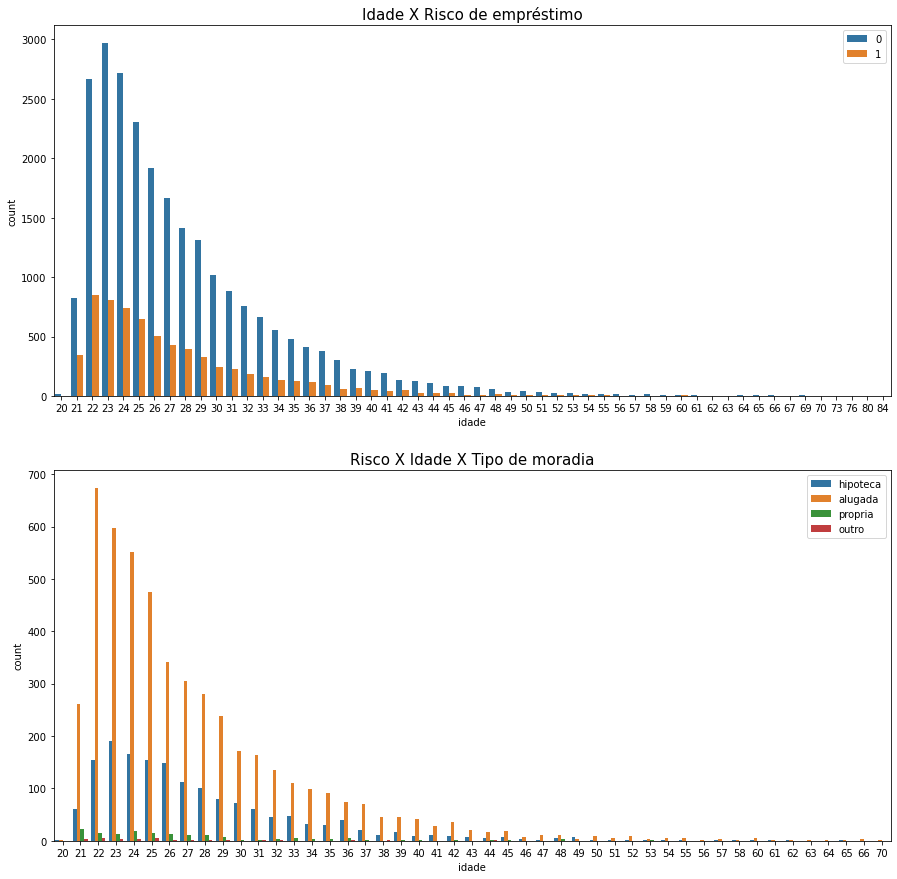

In [17]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
sns.countplot(x='idade',hue='risco_emprestimo',data=df, ax=ax[0])
ax[0].set_title('Idade X Risco de empréstimo',fontsize=15)
ax[0].legend(loc=1)

sns.countplot(x='idade',hue='tipo_moradia',data=df[df['risco_emprestimo']==1], ax=ax[1])
ax[1].set_title('Risco X Idade X Tipo de moradia',fontsize=15)
ax[1].legend(loc=1)

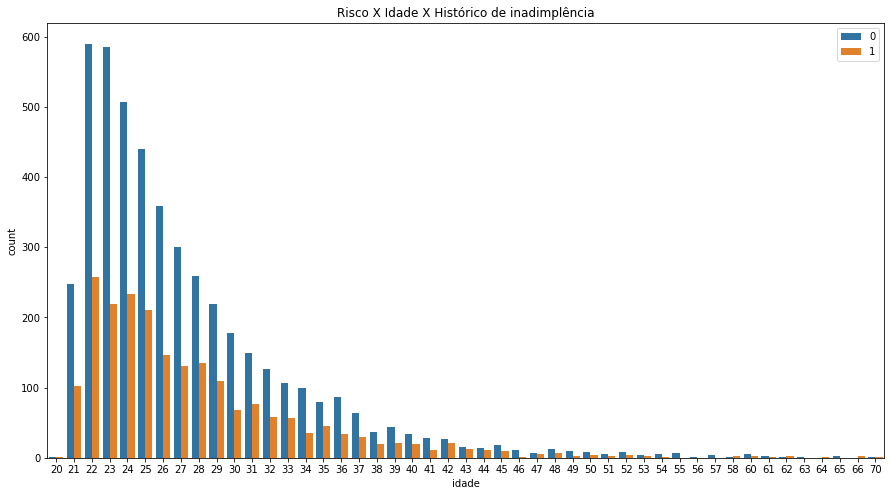

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='idade',hue='inadimplencia_hist',data=df[df['risco_emprestimo']==1])
plt.title('Risco X Idade X Histórico de inadimplência')
plt.legend(loc=1)

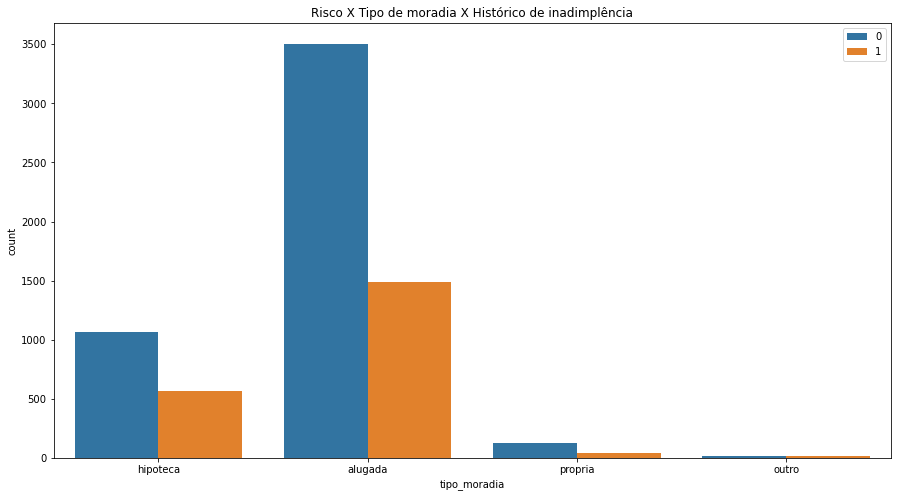

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='tipo_moradia',hue='inadimplencia_hist',data=df[df['risco_emprestimo']==1])
plt.title('Risco X Tipo de moradia X Histórico de inadimplência')
plt.legend(loc=1)

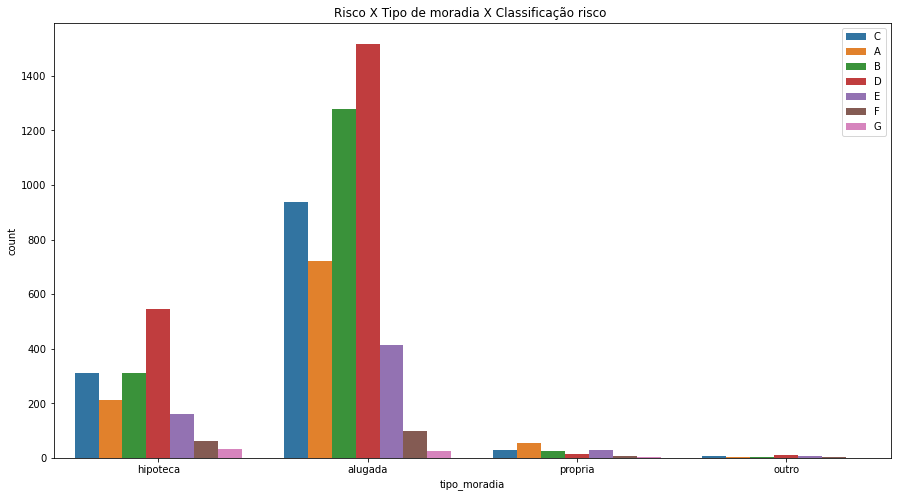

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='tipo_moradia',hue='class_risco_historico',data=df[df['risco_emprestimo']==1])
plt.title('Risco X Tipo de moradia X Classificação risco ')
plt.legend(loc=1)

No handles with labels found to put in legend.


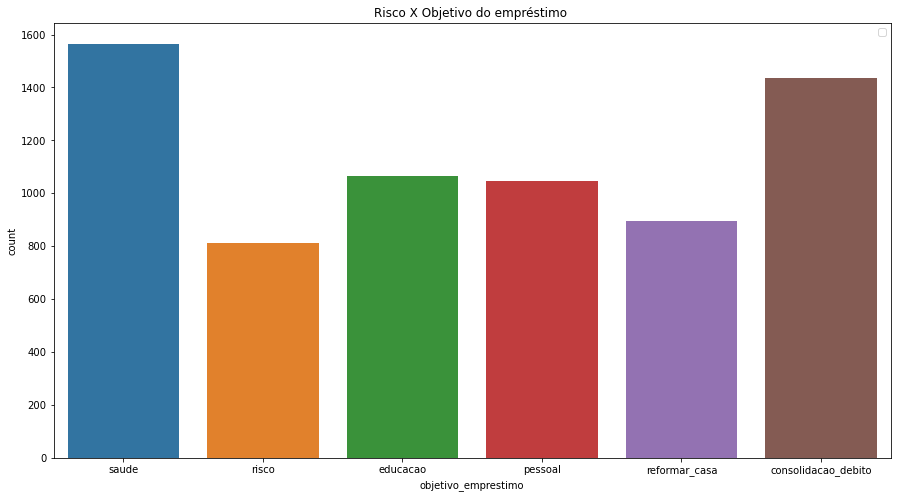

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x='objetivo_emprestimo',data=df[df['risco_emprestimo']==1])
plt.title('Risco X Objetivo do empréstimo ')
plt.legend(loc=1)

# 4 - Machine learning

 - Pre-processamento dos dados

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [24]:
df['tipo_moradia_id']  = encoder.fit_transform(df['tipo_moradia'])
df['objetivo_emprestimo_id']  = encoder.fit_transform(df['objetivo_emprestimo'])
df['class_risco_historico_id']  = encoder.fit_transform(df['class_risco_historico'])

In [25]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo,tipo_moradia_id,objetivo_emprestimo_id,class_risco_historico_id
1,21,5.0,propria,educacao,1000,11.14,9600,0.10,B,0,2,0,3,1,1
2,25,1.0,hipoteca,saude,5500,12.87,9600,0.57,C,0,3,1,1,5,2
3,23,4.0,alugada,saude,35000,15.23,65500,0.53,C,0,2,1,0,5,2
4,24,8.0,alugada,saude,35000,14.27,54400,0.55,C,1,4,1,0,5,2
5,21,2.0,propria,risco,2500,7.14,9900,0.25,A,0,2,1,3,4,0


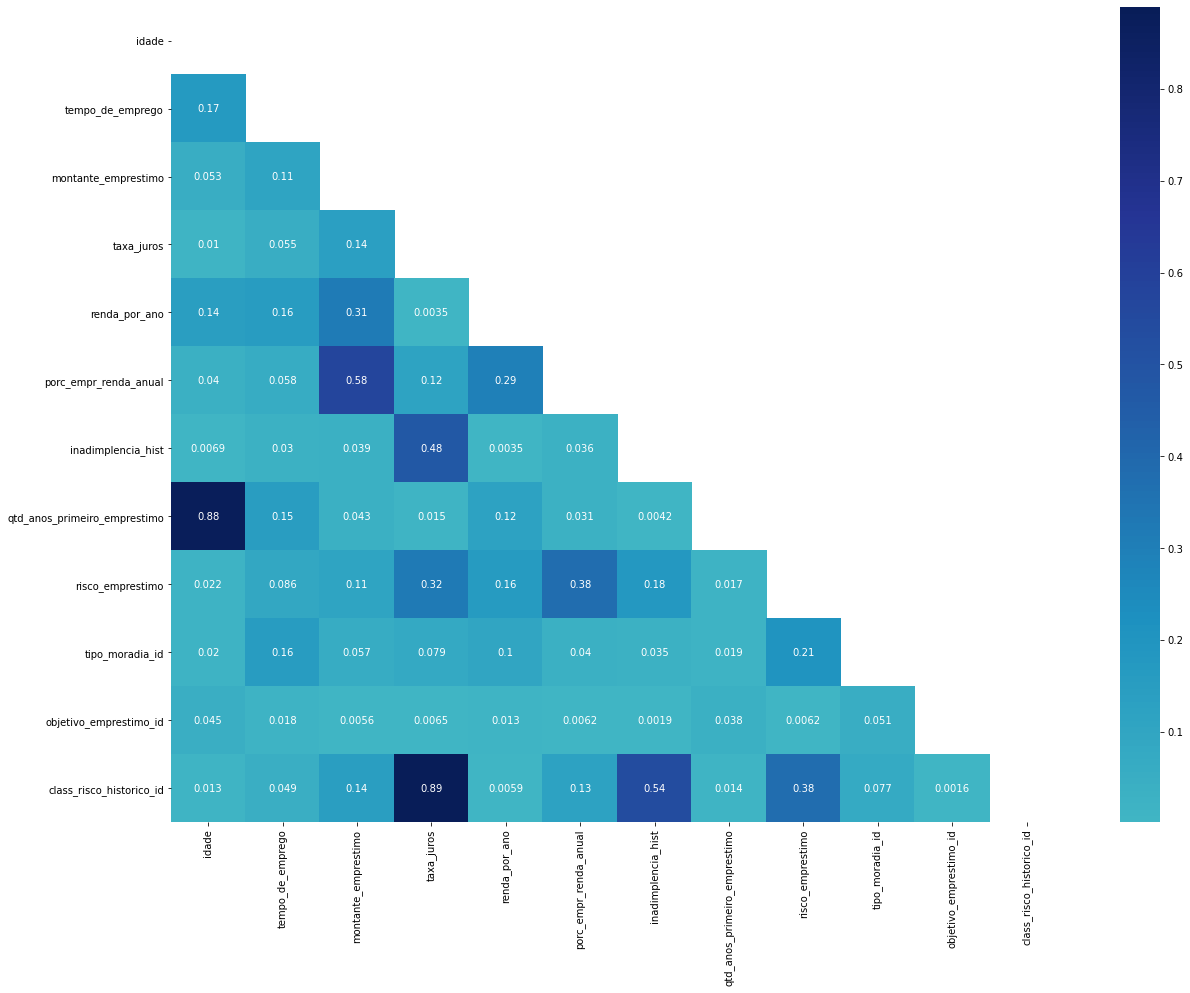

In [26]:
plt.figure(figsize=(20,15))
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap='YlGnBu')

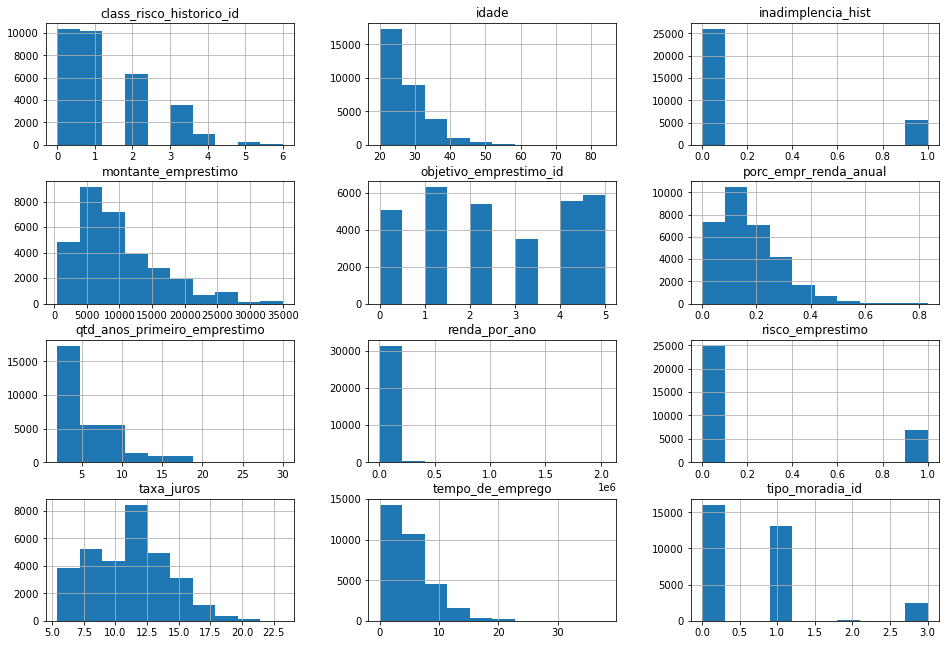

In [27]:
df.hist(figsize=(16,11))
plt.show()

 - relação entre a renda anual, com a porcentagem da renda
 - relação entre o montante do empréstimo


- Divisao treino e teste

In [49]:
dados_ml = df.drop(columns = ['tipo_moradia','objetivo_emprestimo','class_risco_historico'],axis=1)

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()

_ = clf.fit(X,Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importancia'] = clf.feature_importances_

# features[ features.importancia > np.mean(features.importancia)].sort_values(by='importancia',ascending=False)

In [80]:
features.sort_values(by='importancia',ascending=False)

,feature,importancia
5,porc_empr_renda_anual,0.222002
10,class_risco_historico_id,0.126360
4,renda_por_ano,0.112760
3,taxa_juros,0.109734
2,montante_emprestimo,0.083331
8,tipo_moradia_id,0.078212
9,objetivo_emprestimo_id,0.074997
1,tempo_de_emprego,0.072450
0,idade,0.055885
7,qtd_anos_primeiro_emprestimo,0.047882


In [54]:
X = dados_ml.drop('risco_emprestimo',axis=1)
Y = dados_ml['risco_emprestimo']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.2,stratify=Y)

In [47]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.8069926206542757
Validation score 0.8067164137273425
Teste: 0.8080808080808081
ROC AUC
Treino 0.7608193752829333
Test 0.7549788774894387
GaussianNB
Treino: 0.8261315654472988
Validation score 0.825302638895009
Teste: 0.8210227272727273
ROC AUC
Treino 0.7874318495414013
Test 0.7721222651820118
DecisionTreeClassifier
Treino: 1.0
Validation score 0.8879284656273809
Teste: 0.890625
ROC AUC
Treino 1.0
Test 0.8431405448303457
RandomForestClassifier
Treino: 0.9999605382581587
Validation score 0.9329544161136691
Teste: 0.9289772727272727
ROC AUC
Treino 1.0
Test 0.9264191652242347
XGBClassifier
Treino: 0.9321258040329901
Validation score 0.9314549975920302
Teste: 0.9277146464646465
ROC AUC
Treino 0.935223287350947
Test 0.9220030757146025


In [39]:
!pip install xgboost==0.81

In [131]:
clf = XGBClassifier(max_depth=15,n_estimators=250,seed=42)

In [132]:
clf.fit(X_treino, Y_treino)

XGBClassifier(max_depth=15, n_estimators=250, seed=42)

In [133]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do XGBCLassifier foi %.2f%%' % acuracia)

A acurácia do logisticregression foi 93.42%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

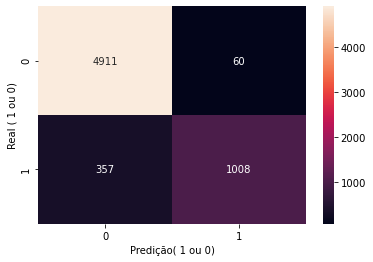

In [134]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [135]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.9463654028530312

In [158]:
print(classification_report(Y_teste, y_proba>0.5))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4971
           1       0.94      0.74      0.83      1365

    accuracy                           0.93      6336
   macro avg       0.94      0.86      0.89      6336
weighted avg       0.93      0.93      0.93      6336

